<h1><p><center><font color=green>A Fun Project to check the most blocked country on the internet</font></center></p></h1>
<h3><p><center><i><font color=blue>by Oguche Adah Peter</font></i></center></p></h3>
<h4><p><center><font color=red>Date: April 15th, 2024</font></center></p></h4>


I first signed up for Interpals on www.interpals.net in 2014 because I needed a window to ocassionally escape from the mental torture of studying Electrical Engineering in a Nigerian public university. The website served this purpose effectively as I connected with people from different countries and cultures, some of whom I still talk to. My interest in learning Finnish all started here after I met some really cool Finns!

Over the years I realised that there are some people on this site who I cannot connect with. No, I wasn't blocked. Filters on this site lets one to block a country or countries, entire continents or genders.

Some of these profiles that I can't connect to describe themselves with words like "down-to-earth", "open-minded", "welcoming"... But how can one be any of these and still block an entire country or continent from connecting with them? 

Hypocricy is that you? Just kidding!

In this pet project, I want to analyze a sample of users whose profile details I pulled from the website in order to:
<p>~ Determine how many users block at least one country or continent</p>
<p>~ Check the most blocked country(ies) and continent(s)</p>





<p> As at the time I started this project, my webscrapping skills were bananas so I had to mannually pull user profile data from the website into a <b>.csv</b> file</p>


I decided on a sample size of <b>3000</b> distributed evenly across continents and gender.
The dataset contains <b>500</b> profiles from <b>each</b> continent. There are <b>250 Female</b> and <b>250 Male</b> profiles from each continent.
To avoid involving spam accounts in my dataset, only profiles that have been active for at least one year were included.

We begin by importing the the necesarry python libraries

In [1]:
import pandas as pd
import numpy as np

Next, let us import the dataset using the <b>.read_csv()</b> function of the pandas library.
We shall assign the name "interpals"

In [2]:
interpals = pd.read_csv('interpals.csv')

In [3]:
#Here is the dataframe
interpals.head(0)

,Username,Gender,Age,Continent,Country,Languages\n spoken,Languages \nLearning,Status,Acct. age,Blocked \nContinent,Blocked \nCountry,Blocked\nSex


In [4]:
interpals.columns

Index(['Username ', 'Gender', 'Age', 'Continent', 'Country',
       'Languages\n spoken', 'Languages \nLearning', 'Status', 'Acct. age',
       'Blocked \nContinent', 'Blocked \nCountry', 'Blocked\nSex'],
      dtype='object')

The column names do not look tidy so we shall use the <b>.rename(columns={})</b> function to rename the column headers to meet standards

In [5]:
interpals.rename(columns = {'Username ':'username', 'Gender':'gender', 'Age':'age', 'Continent':'continent',
                            'Country':'country','Languages\n spoken':'lang_spoken', 'Languages \nLearning':'lang_learning',
                           'Status':'status','Acct. age':'acct_age', 'Blocked \nContinent':'blocked_continent',
                           'Blocked \nCountry':'blocked_country', 'Blocked\nSex':'blocked_sex'}, inplace = True)
interpals.head(0)

,username,gender,age,continent,country,lang_spoken,lang_learning,status,acct_age,blocked_continent,blocked_country,blocked_sex


Let us explore some descriptive statistics of our dataset

In [6]:
#checking for the number of records
len(interpals.index)

3000

This does not tell us whether or not some values are repeated.
So, next, we check for distinct values using the <b>.nunique()</b> method

In [7]:
interpals['username'].nunique()

3000

Since the number of Unique usernames is equal to the number of usernames, we can conclude that there are no duplicated enteries. <h6>woohoo!</h6> Two weeks of collecting CLEAN data, <b>Check!</b> 

Next, we examine the continent and country coulums to determine if all continents are represented and to also check the number of countries represented

In [8]:
#How many continents are represented?
interpals['continent'].nunique()

6

In [9]:
#How many countries are represented?
interpals['country'].nunique()

144

In [10]:
#Genders represented
interpals['gender'].nunique()

2

In [11]:
gender_counts = interpals['gender'].value_counts()
gender_counts

M    1500
F    1500
Name: gender, dtype: int64

So in the dataset, we have a total of <b>1500 Males</b> and <b>1500 Females</b> evenly distributed across <b>144 countries</b> from <b>6 continents</b>

Now we query the dataset to draw only the users that blocked at least one country.
<p>This is the point where I confess my undying love for the <b>.query()</b> function</p>

In [14]:
#python query to pull data of only the users that blocked at least one country and create a new dataset
blockedCountries = interpals.query("blocked_country!='0'")

<b><font color=red><h7>To protect the privacy of users, I will drop the "username" column since I intend to make this notebook public</h7></font></b>

In [22]:
blockedCountries.drop(['username'], axis=1)


,gender,age,continent,country,lang_spoken,lang_learning,status,acct_age,blocked_continent,blocked_country,blocked_sex
4,F,37,Europe,Russia,2,1,99,5,0,"Turkey, Algeria",0
13,M,35,Asia,India,3,2,0,1,0,Oman,0
16,F,23,Europe,Russia,2,3,0,1,0,"Tunisia, Albania, Algeria, Azerbaijan, Iran, I...",0
17,F,23,North America,Mexico,2,0,99,2,"Africa, Europe, North America","Turkey, Pakistan, India",0
18,M,46,Europe,United Kingdom,1,1,99,2,Africa,"Philipines, China",0
...,...,...,...,...,...,...,...,...,...,...,...
2959,F,26,Europe,Russia,2,2,1,10,0,"Algeria, Indonesia, Morocco, Pakistan, Turkey,...",0
2965,M,44,Australia,Australia,3,1,0,13,Africa,China,0
2982,F,45,Asia,Japan,1,2,0,1,Africa,"Afghanistan, China, South Korea, Philipines",0
2988,F,59,Africa,South Africa,1,0,99,1,Africa,Sri Lanka,0


In [23]:
blockedCountries['username'].nunique()

552

<b>552</b> users blocked at least one country!

In [24]:
percentage_of_blocked = ((blockedCountries['username'].nunique()/interpals['username'].nunique())*100)
print(percentage_of_blocked)

18.4


About <font color=red><h7>18.4%</h7></font> of all users blocked at least one country from contacting them

Now we examine the percentage of users that blocked an entire continent

In [26]:
blockedContinent = interpals.query("blocked_continent!='0'")


In [27]:
blockedContinent['username'].nunique()

420

<b>420</b> Users blocked entire continents!

In [28]:
percentage_of_blocked_1 = ((blockedContinent['username'].nunique()/interpals['username'].nunique())*100)
print(percentage_of_blocked_1)

14.000000000000002


About <font color=red><h7>14%</h7></font> of all users blocked at least one continent

In [30]:
females = interpals.query("gender == 'F'")

In [32]:
b_females = females.query("blocked_country !='0'")


In [33]:
b_females['username'].nunique()

392

In [34]:
males = interpals.query("gender =='M'")


In [36]:
b_males = males.query("blocked_country !='0'")


In [37]:
b_males['username'].nunique()

160

Of the 552 users that blocked at least one country, <b>392</b> are Females and <b>160</b> are Males

Next, we create a <b>pie chart</b> to show by proportion, how users blocked countries, based on their gender.
<p>We begin by importing the matplotlib library</p>

In [38]:
import matplotlib.pyplot as plt

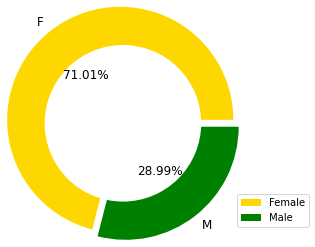

In [39]:
explode = (0.05, 0.05,)
blockedCountries.groupby(['gender']).size().plot.pie(
                                                     autopct="%.2f%%", pctdistance = 0.5, explode = explode,
                                                     fontsize=12, radius = 1.3, colors=['gold','green'])
labels = ['Female','Male']
plt.legend(labels, bbox_to_anchor=(1,0), loc="lower left")
plt.ylabel("")
center_circle = plt.Circle((0, 0), .90, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

In [40]:
blockedCountries = blockedCountries.explode(['blocked_country'])


In [43]:
text = blockedCountries[['gender', 'continent', 'country', 'blocked_continent', 'blocked_country']]

In [44]:
text.explode(['blocked_country']).head()

,gender,continent,country,blocked_continent,blocked_country
4,F,Europe,Russia,0,"Turkey, Algeria"
13,M,Asia,India,0,Oman
16,F,Europe,Russia,0,"Tunisia, Albania, Algeria, Azerbaijan, Iran, I..."
17,F,North America,Mexico,"Africa, Europe, North America","Turkey, Pakistan, India"
18,M,Europe,United Kingdom,Africa,"Philipines, China"


In [45]:
#The new data saved was saved as a .csv file using the _to.csv function in the pandas librabry
text.to_csv('test.csv')

The file is further processed in excel to a list of all blocked countries and saved as a text file: countries_list.txt

Lastly, we generate a wordcloud to show the most blocked countries

<p><b>What are wordclouds?</b></p> A wordcloud is a depiction of the importance of a certain word in a body text. The more a word appears in the textual data, the bolder the word will appear in the wordcloud. Tha higher the frequency of occurence of a word, the bolder it appears in a wordcloud.

In [46]:
pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [47]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt

In [48]:
import sys
import os

In [49]:
text_b = open('countries_list.txt', mode='r').read()

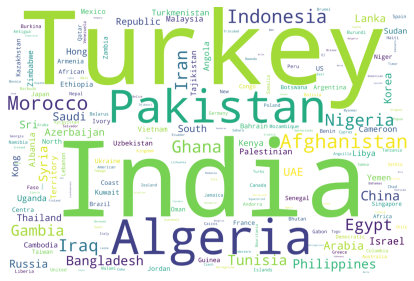

In [55]:
wordcloud = WordCloud(background_color="white", collocations = False, height=4000, width=6000).generate(text_b)
plt.imshow(wordcloud)
plt.imshow(wordcloud)
plt.tight_layout(pad=0)
plt.axis("off")
plt.show()

From the wordcloud above, we can conclude that the most blocked countries include India, Turkey, Pakistan, Afghanistan, Algeria, Morocco, Indonesia, Ghana, Iran, Egypt and my own Nigeria!

<p>I guess that goes to explain why I come across lots of profile that I can't connect with. I can only imagine how much more frustrating it is for my friends from Turkey, India, Algeria and Pakistan.</p>



<p>The next question is why. <font color='red'>Why are these countries blocked more often?</font> What must have informed the decisions of users to block certain countries?  We will look into these questions soon!</p>